# Training, Learning, Gradient Descent

<div style="padding: 5px; border: 5px solid #a10000ff;">

**Hinweis:** In den Codezellen sind jeweils einige Codeteile nicht programmiert. Diesen Code müssen Sie ergänzen. Die jeweiligen Stellen sind mit einem Kommentar und dem Keyword **TODO** vermerkt und z.T. Stellen mit ... markiert.

Ausserdem gibt es einige assert Statements. Diese geben einen Fehler aus, sollte etwas bei Ihrer Programmierung nicht korrekt sein.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
import torch


## Datenset

Wir möchten in dieser Übung mit dem Datenset der Titanic Passagiere arbeiten. Dabei sind in den Daten folgende Merkmale (Features) festgehalten.

- **Survived**: 1= Hat überlebt, 0= hat nicht überlebt
- **Sex**: 1 = weiblich, 0 = männlich
- **Age**: Alter der Personen
- **Pclass**: In welcher Klasse die Person gereist ist.

Wir möchten mit unserem Modell vorhersagen ob eine Person aufgrund der Merkmale Sex, Age, Pclass überlebt hat oder nicht.

In [40]:
# Wir laden das Datenset mit den Angaben zu den Titanic Passagieren
data_training = pd.read_csv('./datasets/titanic_train.csv')
data_test = pd.read_csv('./datasets/titanic_test.csv')


In [41]:
# Trainings und Testdaten vorbereiten


X_test = data_test[['Pclass', 'Age', 'Sex']]
y_test = data_test['Survived']

X_train = data_training[['Pclass', 'Age', 'Sex']]
y_train = data_training['Survived']




## Modell erstellen und trainieren

In [ ]:
# Wir nutzen nun ein Modell um das Überleben der Passagiere vorherzusagen

# Wir erstellen ein erstes einfaches Modell mti PyTorch
# Die Details müssen Sie noch nicht verstehen
model = nn.Sequential(
    nn.Linear(3, 10),
    nn.ReLU(),
    nn.Linear(10, 2),
    nn.Softmax(dim=1)
)

# Für pytorch müssen wir die Daten in Tensors umwandeln
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Wir definieren die Loss-Funktion und den Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []

# Wir trainieren das Modell über mehrere Epochen. Eine Epoche bedeutet, dass das gesamte Datenset einmal durchlaufen wird.
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward Pass - Vorhersage des Modells
    y_pred = model(X_train_tensor)

    # Berechnung des Loss mit den Vorhersagen und den tatsächlichen Werten
    loss = loss_fn(y_pred, y_train_tensor)

    # Wir setzen die Gradienten auf Null zurück. Dies ist notwendig, da PyTorch die Gradienten standardmässig aufsummiert.
    optimizer.zero_grad()

    # Berechnung des Gradienten
    loss.backward()

    # Aktualisierung der Modellparameter mit dem Optimizer. Hier lernt das Modell.
    optimizer.step()

    train_losses.append(loss.item())

    with torch.no_grad():
        y_test_pred = model(X_test_tensor)
        test_loss = loss_fn(y_test_pred, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/1000], Loss: 0.5446
Epoch [100/1000], Loss: 0.5017
Epoch [150/1000], Loss: 0.4895
Epoch [200/1000], Loss: 0.4845
Epoch [250/1000], Loss: 0.4821
Epoch [300/1000], Loss: 0.4807
Epoch [350/1000], Loss: 0.4798
Epoch [400/1000], Loss: 0.4792
Epoch [450/1000], Loss: 0.4788
Epoch [500/1000], Loss: 0.4785
Epoch [550/1000], Loss: 0.4783
Epoch [600/1000], Loss: 0.4780
Epoch [650/1000], Loss: 0.4779
Epoch [700/1000], Loss: 0.4777
Epoch [750/1000], Loss: 0.4776
Epoch [800/1000], Loss: 0.4777
Epoch [850/1000], Loss: 0.4774
Epoch [900/1000], Loss: 0.4773
Epoch [950/1000], Loss: 0.4773
Epoch [1000/1000], Loss: 0.4772


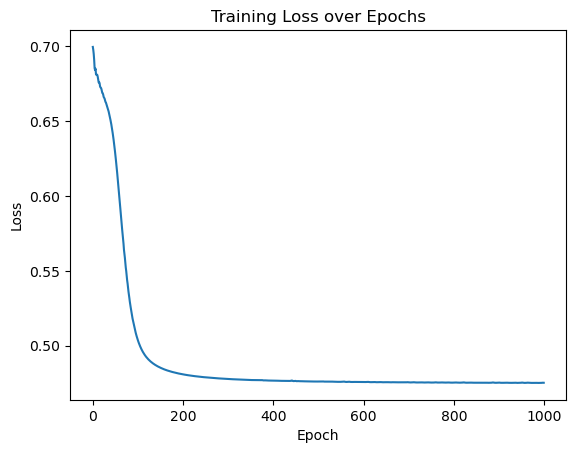

In [ ]:
#Wir zeigen nun den Loss nach jeder Epoche an
plt.plot(range(num_epochs), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

## Aufgabe 1
**Frage A** Was sind im Code die Epochen? Halten Sie dies als Code-Kommentar fest.

**Frage B** Nach wie vielen Epochen haben wir fast keine Verbesserung mehr im Loss?

**Frage C** Wo im Code werden die Vorhersagen des Modells mit den echten Targets verglichen? Halten Sie dies als Kommentar fest.

**Frage D** Wo im Code lernt das Modell aus den Fehlern? Halten Sie dies im Code als Kommentar fest.


## Modell Testen

Wir haben gesehen, dass sich das Modell bereits nach einigen Epochen nicht mehr viel verbessert. 

Bis anhin haben wir nur auf den Trainingsdaten gelernt und da den Fehler ausgewertet. Was wir nun aber machen wollen ist, zu schauen wie gut das Modell mit ungesehenen Daten umgehen kann.
Dazu plotten wir nun auch den Loss auf den Testdaten.

Mit der Anweisung `with torch.no_grad():` stellen wir sicher, dass das Modell nicht aus den Testdaten lernt.

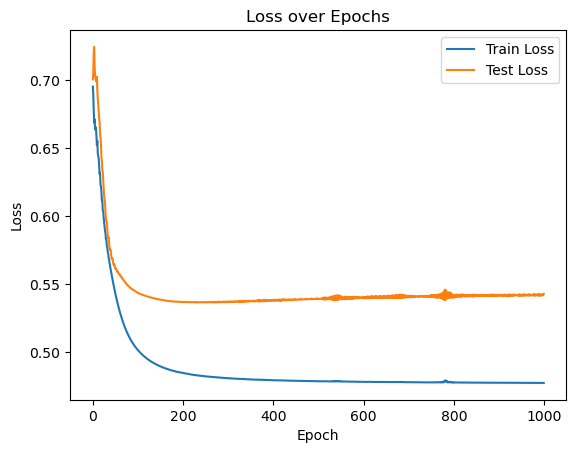

In [46]:
#Wir zeigen nun den Loss nach jeder Epoche an
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

## Aufgabe 2

**Frage A**: Was beobachten Sie bezüglich dem Train und dem Test Loss?

**Frage B**: Was ist der Zweck, dass Testdaten eingesetzt werden und weshalb möchten wir, dass das Modell aus diesen Daten nicht lernt?

## Aufgabe 3

Unten wurde für ein Netzwerk der Loss im Bezug zum Modellparameter w symbolisch aufgezeichnet.


**Frage A:** Welche Lösungsmöglichkeiten sehen Sie, dass wir nicht in einem lokalen Minimum hängen bleiben?

**Frage B:** Welchen Einfluss hat die Initialisierung der Modellparameter bzw. Gewichte auf das Ergebnis der Optimierung des Modells?

**Frage C:** Welche Lösungen sehen Sie um nicht in einem lokalen Minimum gefangen zu bleiben oder nie im globalen Minimum anzukommen?

**Frage D:** Wo im Code von Aufgabe 1 findet die Gradientenberechnung und die Backward Propagation statt? Halten Sie dies als Kommentar im Code fest.


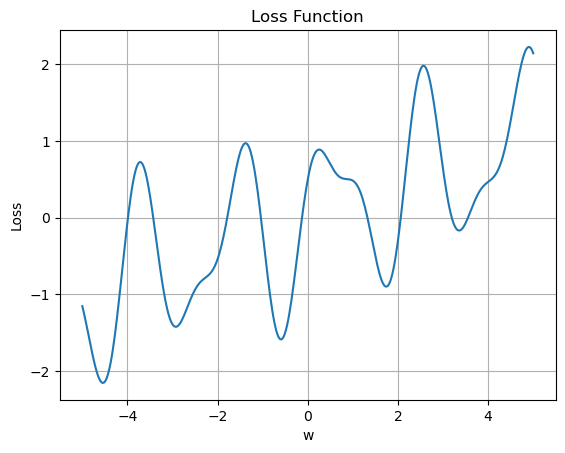

In [50]:
# Wir plotten eine Loss Funktion, welche mehrere lokale Minima hat
def complex_loss(x):
    return np.sin(3 * x) + 0.5 * np.cos(5 * x) + 0.2 * x
x = np.linspace(-5, 5, 400)
y = complex_loss(x)
plt.plot(x, y)
plt.title('Loss Function')
plt.xlabel('w')
plt.ylabel('Loss')
plt.grid()
plt.show()
